# Data Ingestion:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder 
import warnings 
warnings.filterwarnings('ignore')
from textblob import TextBlob
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('listings.csv',low_memory = False)

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,20164,https://www.airbnb.com/rooms/20164,20190818165806,2019-08-18,The Tiki Hut,"This stunning home features a Huge Tiki-Hut, L...",This stunning home features a beautiful Tiki h...,"This stunning home features a Huge Tiki-Hut, L...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN
1,42084,https://www.airbnb.com/rooms/42084,20190818165806,2019-08-18,Oceanview luxury hotel suite,Luxury property located in the heart of the Ft...,All the comforts of home and a glorious ocean ...,Luxury property located in the heart of the Ft...,none,Can't beat the location. The Fort Lauderdale B...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.14
2,57818,https://www.airbnb.com/rooms/57818,20190818165806,2019-08-18,PRIVATE HOUSE NEAR BEACH SLEEP 5,Beautifully private duplex that allows you to ...,Peaceful house on Nature Preserve Close to eve...,Beautifully private duplex that allows you to ...,none,"This is a family oriented, quiet, peaceful nei...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.47
3,69824,https://www.airbnb.com/rooms/69824,20190818165806,2019-08-18,2 bd/2ba Oceanfront Condo,NaN,Beautiful and meticulous 2 master suite luxury...,Beautiful and meticulous 2 master suite luxury...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.29
4,83449,https://www.airbnb.com/rooms/83449,20190818165806,2019-08-18,MARY POP APTS 2/1 APT SLEEP 5,MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...,NOTE: WE ARE HERE TO HELP YOU . TEMPORARY ACCO...,MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,7,7,0,0,0.20


By analyzing the columns manually one by one we have removed the following columns as they don't provide valuable information to our model or there arent enough entries in those columns.

### Using Sentiment analysis to convert comments to numeric value:

In [4]:
df_rev = pd.read_csv('reviews.csv')
df_rev.drop(['id','date','reviewer_id','reviewer_name'],axis = 1,inplace = True)

In [5]:
t1 = []
t2 = []
for i in df_rev['comments']:
    t1.append(TextBlob(str(i)).sentiment[0])
    t2.append(TextBlob(str(i)).sentiment[1])
df_rev['pol'] = t1
df_rev['sub']= t2

In [6]:
grp = df_rev.groupby('listing_id').mean()

In [7]:
df.index = df['id']
df.drop('id',1,inplace = True)

In [8]:
df1 = df.join(grp)

In [9]:
df1

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,pol,sub
id,,,,,,,,,,,,,,,,,,,,,
20164,https://www.airbnb.com/rooms/20164,20190818165806,2019-08-18,The Tiki Hut,"This stunning home features a Huge Tiki-Hut, L...",This stunning home features a beautiful Tiki h...,"This stunning home features a Huge Tiki-Hut, L...",none,NaN,NaN,...,strict_14_with_grace_period,f,f,3,3,0,0,NaN,NaN,NaN
42084,https://www.airbnb.com/rooms/42084,20190818165806,2019-08-18,Oceanview luxury hotel suite,Luxury property located in the heart of the Ft...,All the comforts of home and a glorious ocean ...,Luxury property located in the heart of the Ft...,none,Can't beat the location. The Fort Lauderdale B...,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,1.14,0.443987,0.603733
57818,https://www.airbnb.com/rooms/57818,20190818165806,2019-08-18,PRIVATE HOUSE NEAR BEACH SLEEP 5,Beautifully private duplex that allows you to ...,Peaceful house on Nature Preserve Close to eve...,Beautifully private duplex that allows you to ...,none,"This is a family oriented, quiet, peaceful nei...",NO SMOKING! indoors and prefer no pets...espec...,...,strict_14_with_grace_period,f,f,1,1,0,0,0.47,0.400297,0.605806
69824,https://www.airbnb.com/rooms/69824,20190818165806,2019-08-18,2 bd/2ba Oceanfront Condo,NaN,Beautiful and meticulous 2 master suite luxury...,Beautiful and meticulous 2 master suite luxury...,none,NaN,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,0.29,0.345662,0.569938
83449,https://www.airbnb.com/rooms/83449,20190818165806,2019-08-18,MARY POP APTS 2/1 APT SLEEP 5,MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...,NOTE: WE ARE HERE TO HELP YOU . TEMPORARY ACCO...,MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...,none,NaN,NaN,...,strict_14_with_grace_period,t,t,7,7,0,0,0.20,0.391817,0.511313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37861711,https://www.airbnb.com/rooms/37861711,20190818165806,2019-08-18,"Г) Private room. Airport, beach nearby.",NaN,NaN,NaN,none,NaN,NaN,...,strict_14_with_grace_period,f,f,21,0,1,20,NaN,NaN,NaN
37861992,https://www.airbnb.com/rooms/37861992,20190818165806,2019-08-18,"Г) Private room. Airport, beach nearby.",NaN,NaN,NaN,none,NaN,NaN,...,strict_14_with_grace_period,f,f,25,0,1,24,NaN,NaN,NaN
37863148,https://www.airbnb.com/rooms/37863148,20190818165806,2019-08-18,TRIPPLE 4! 4 ROOMS. 4 BEDS. 4 BATHROOMS. COMFORT!,"Although not very fancy, you can be comfortabl...",NaN,"Although not very fancy, you can be comfortabl...",none,NaN,NaN,...,flexible,f,f,1,1,0,0,NaN,NaN,NaN


In [10]:
df = df1.copy()

In [11]:
df.reset_index(inplace = True)

In [12]:
df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood','license','weekly_price','monthly_price','host_acceptance_rate','neighbourhood','neighbourhood_group_cleansed','square_feet',
        'first_review','last_review','host_verifications','city','zipcode','smart_location',
        'country_code','country','latitude','longitude','street','neighbourhood_cleansed','state',
        'calendar_updated','jurisdiction_names','calendar_last_scraped'],axis = 1,inplace = True)

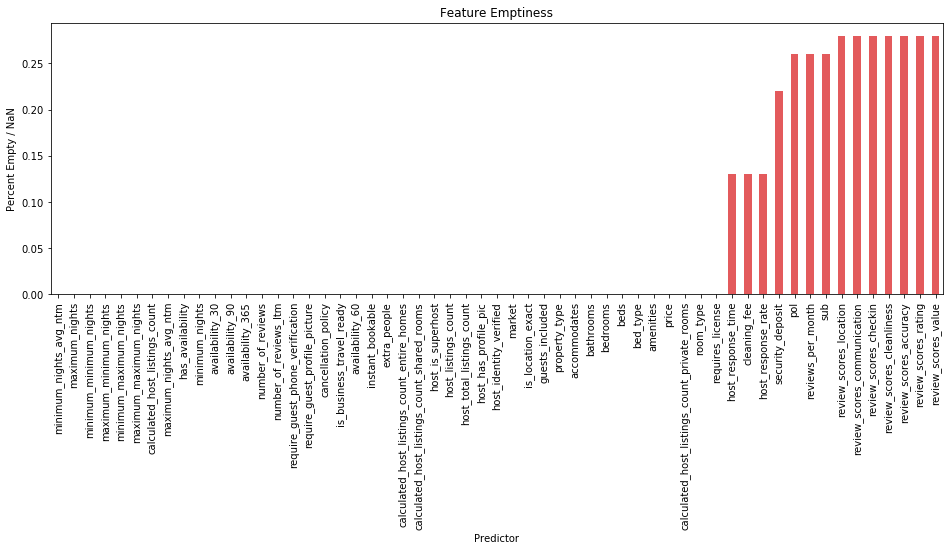

In [13]:
def percent_empty(df):
    """This function calculate the percentage and count of missing values for a feature"""
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))

# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
host_response_time,12.887113
host_response_rate,12.887113
host_is_superhost,0.189810
host_listings_count,0.189810
host_total_listings_count,0.189810
host_has_profile_pic,0.189810
host_identity_verified,0.189810
market,0.099900
is_location_exact,0.000000
property_type,0.000000


In [15]:
df.describe()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,pol,sub
count,9991.000000,9991.000000,10010.000000,10006.000000,10005.000000,10003.000000,10010.000000,10010.000000,10010.000000,10010.000000,...,7233.000000,7230.000000,7230.000000,10010.000000,10010.000000,10010.000000,10010.000000,7369.000000,7369.000000,7369.000000
mean,61.106896,61.106896,4.519880,1.533380,1.618991,2.448465,2.049051,5.538462,774.635964,5.326973,...,9.661966,9.657676,9.407607,14.588811,12.762438,1.151049,0.675325,1.607091,0.396213,0.574779
std,241.382016,241.382016,2.832179,0.884163,1.192389,1.782353,2.061084,18.522122,9011.651049,18.097186,...,0.910432,0.760571,0.996451,28.999536,28.508116,3.671053,4.159244,1.765788,0.148268,0.152946
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000,-1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.250000,1.000000,...,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.390000,0.342828,0.533333
50%,4.000000,4.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1125.000000,2.000000,...,10.000000,10.000000,10.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.409667,0.602443
75%,20.000000,20.000000,6.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1125.000000,3.000000,...,10.000000,10.000000,10.000000,12.000000,9.000000,1.000000,0.000000,2.200000,0.465939,0.652565
max,1717.000000,1717.000000,29.000000,20.000000,21.000000,18.000000,20.000000,500.000000,900000.000000,500.000000,...,10.000000,10.000000,10.000000,156.000000,156.000000,35.000000,33.000000,19.440000,1.000000,1.000000


In [16]:
df = df[df['market'].notnull()]

In [17]:
df['is_location_exact']= df['is_location_exact'].map({'f':0,'t':1})

In [18]:
df['room_type'] = df['room_type'].map({'Shared room':0,'Private_room':1,'Entire home/apt':2})

In [19]:
hrr = []
for i in df['property_type']:
    if i == 'House':
        hrr.append(3)
    elif i == 'Apartment':
        hrr.append(2)
    elif i == 'Condominium':
        hrr.append(1)
    else:
        hrr.append(0)
df['property_type'] = hrr

In [20]:
hrr = []
df['host_response_rate'] = df['host_response_rate'].replace(np.NaN,'?')
for i in df['host_response_rate']:
    c = i.split('%')
    hrr.append(c[0])
df['host_response_rate'] = hrr
df['host_response_rate'] = df['host_response_rate'].replace('?',np.NaN)
df['host_response_rate'] = df['host_response_rate'].astype('float')

In [21]:
df['host_response_time'] = df['host_response_time'].replace('nan',np.NaN)

In [22]:
hrr = []
for i in df['host_response_time']:
    c = str(i).replace(' ',"")
    hrr.append(c)
df['host_response_time'] = hrr


In [23]:
df['host_response_time'] = df['host_response_time'].map({'afewdaysormore':0,'withinaday':1,'withinafewhours':2,'withinanhour':3})


In [24]:
df['host_is_superhost']= df['host_is_superhost'].map({'f':0,'t':1})

In [25]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f':0,'t':1})

In [26]:
df['host_identity_verified'] = df['host_identity_verified'].map({'f':0,'t':1})

In [27]:
hrr = []
df['security_deposit'] = df['security_deposit'].replace(np.NaN,'?')
for i in df['security_deposit']:
    c = i.split('$')
    if len(c)>1:
        hrr.append(c[1])
    else:
        hrr.append(c[0])
df['security_deposit'] = hrr
df['security_deposit'] = df['security_deposit'].replace('?',np.NaN)
hrr = []
for i in df['security_deposit']:
    hrr.append(str(i).replace(',',""))
df['security_deposit'] = hrr
df['security_deposit'] = df['security_deposit'].astype('float')
    

In [28]:
hrr = []
df['cleaning_fee'] = df['cleaning_fee'].replace(np.NaN,'?')
for i in df['cleaning_fee']:
    c = i.split('$')
    if len(c)>1:
        hrr.append(c[1])
    else:
        hrr.append(c[0])
df['cleaning_fee'] = hrr
df['cleaning_fee'] = df['cleaning_fee'].replace('?',np.NaN)
hrr = []
for i in df['cleaning_fee']:
    hrr.append(str(i).replace(',',""))
df['cleaning_fee'] = hrr
df['cleaning_fee'] = df['cleaning_fee'].astype('float')

In [29]:
price = []
for i in df['price']:
    c = i.replace('$','')
    price.append(c)

In [30]:
p1 = []
for i in price:
    c = i.replace(',',"")
    c = float(c)
    p1.append(c)
    

In [31]:
df['price'] = p1

In [32]:
enc = LabelEncoder()

In [33]:
df['market'] = enc.fit_transform(df['market'])

In [34]:
hrr = []
for i in df['amenities']:
    c = len(i)
    hrr.append(c)
df['amenities'] = hrr

In [35]:
price = []
for i in df['extra_people']:
    c = i.replace('$','')
    price.append(c)
p1 = []
for i in price:
    c = i.replace(',',"")
    c = float(c)
    p1.append(c)
df['extra_people'] = p1

In [36]:
df['has_availability']= df['has_availability'].map({'f':0,'t':1})

In [37]:
df['requires_license'] = df['requires_license'].map({'f':0,'t':1})

In [38]:
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].map({'f':0,'t':1})

In [39]:
df['require_guest_profile_picture'] =df['require_guest_profile_picture'].map({'f':0,'t':1})

In [40]:
df['instant_bookable'] = df['instant_bookable'].map({'f':0,'t':1})

In [41]:
df['is_business_travel_ready'] = df['is_business_travel_ready'].map({'f':0,'t':1})

In [42]:
df['bed_type'] = enc.fit_transform(df['bed_type'])

In [43]:
df['cancellation_policy'] = enc.fit_transform(df['bed_type'])

In [44]:
num_cols = df[['host_listings_count', 'host_total_listings_count','price',
       'security_deposit', 'cleaning_fee','extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating','reviews_per_month','host_response_rate','pol','sub']]

In [45]:
pd.DataFrame(list(num_cols),columns = ['num_cols'])

,num_cols
0,host_listings_count
1,host_total_listings_count
2,price
3,security_deposit
4,cleaning_fee
5,extra_people
6,minimum_nights
7,maximum_nights
8,minimum_minimum_nights
9,maximum_minimum_nights


In [46]:
c = []
for i in df.columns:
    if i not in num_cols.columns:
        c.append(i)
cat_cols = df[c]
cat_cols = cat_cols.astype('object')

In [47]:
pd.DataFrame(list(cat_cols),columns = ['cat_cols'])

,cat_cols
0,host_response_time
1,host_is_superhost
2,host_has_profile_pic
3,host_identity_verified
4,market
5,is_location_exact
6,property_type
7,room_type
8,accommodates
9,bathrooms


In [48]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
bn = imp.fit_transform(cat_cols) 
bn = pd.DataFrame(bn)
bn.columns = cat_cols.columns

Now we have cleaned the data we will now handle the missing values using KNN impute

In [49]:
from fancyimpute import KNN 
num_c = list(num_cols)
num_cols = pd.DataFrame(KNN(k=5).fit_transform(num_cols))
num_cols.columns = num_c

Using TensorFlow backend.


Imputing row 1/10000 with 4 missing, elapsed time: 45.144
Imputing row 101/10000 with 5 missing, elapsed time: 45.155
Imputing row 201/10000 with 0 missing, elapsed time: 45.163
Imputing row 301/10000 with 4 missing, elapsed time: 45.173
Imputing row 401/10000 with 0 missing, elapsed time: 45.181
Imputing row 501/10000 with 1 missing, elapsed time: 45.189
Imputing row 601/10000 with 0 missing, elapsed time: 45.197
Imputing row 701/10000 with 1 missing, elapsed time: 45.212
Imputing row 801/10000 with 0 missing, elapsed time: 45.220
Imputing row 901/10000 with 1 missing, elapsed time: 45.229
Imputing row 1001/10000 with 0 missing, elapsed time: 45.239
Imputing row 1101/10000 with 2 missing, elapsed time: 45.252
Imputing row 1201/10000 with 3 missing, elapsed time: 45.261
Imputing row 1301/10000 with 0 missing, elapsed time: 45.273
Imputing row 1401/10000 with 1 missing, elapsed time: 45.281
Imputing row 1501/10000 with 0 missing, elapsed time: 45.292
Imputing row 1601/10000 with 2 missi

In [50]:
df = num_cols.join(bn)

In [51]:
df.isnull().sum()

host_listings_count                             0
host_total_listings_count                       0
price                                           0
security_deposit                                0
cleaning_fee                                    0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0


Now the data is cleansed and it is ready to be analyzed.

# Statistical Analysis of data:

Lets see how some of these features are statistically related to our target column price

In [52]:
b1 = df[df['bedrooms']==1.0]['price']
b2 = df[df['bedrooms']==2.0]['price']
b3 = df[df['bedrooms']==3.0]['price']
b4 = df[df['bedrooms']==0.0]['price']
b5 = df[df['bedrooms']==4.0]['price']

In [53]:
bedr = pd.DataFrame()

df1            = pd.DataFrame({'b': '1', 'val':b1})
df2            = pd.DataFrame({'b': '2', 'val':b2})
df3            = pd.DataFrame({'b': '3', 'val':b3})
df4            = pd.DataFrame({'b': '4', 'val':b4})
df5            = pd.DataFrame({'b': '5', 'val':b5})


bedr = bedr.append(df1) 
bedr = bedr.append(df2) 
bedr = bedr.append(df3) 
bedr = bedr.append(df4) 
bedr = bedr.append(df5) 

In [54]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('val ~ b', data = bedr).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F         PR(>F)
b         6.536857e+07     4.0  324.96098  6.532927e-263
Residual  4.897196e+08  9738.0        NaN            NaN


Here the p value is <0.05 so we reject the null hypothesis that based on the no of bedrooms price are  not similar to one another.
so bedroom is a significant factor for predicting price.

In [55]:
br1 = df[df['bathrooms']==1.0]['price']
br2 = df[df['bathrooms']==2.0]['price']
br3 = df[df['bathrooms']==3.0]['price']

In [56]:
bath = pd.DataFrame()

df1            = pd.DataFrame({'b': '1', 'val':br1})
df2            = pd.DataFrame({'b': '2', 'val':br2})
df3            = pd.DataFrame({'b': '3', 'val':br3})

bath = bath.append(df1) 
bath = bath.append(df2) 
bath = bath.append(df3)

In [57]:
mod = ols('val ~ b', data = bath).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F         PR(>F)
b         5.002261e+07     2.0  536.927075  5.582300e-221
Residual  4.179831e+08  8973.0         NaN            NaN


Here the p value is <0.05 so we reject the null hypothesis that based on the no of bathrooms price are  not similar to one another.
so bathroom is a significant factor for predicting price.

In [58]:
be1 = df[df['beds']==1.0]['price']
be2 = df[df['beds']==2.0]['price']
be3 = df[df['beds']==3.0]['price']
be4 = df[df['beds']==4.0]['price']

In [59]:
bed = pd.DataFrame()

df1            = pd.DataFrame({'b': '1', 'val':be1})
df2            = pd.DataFrame({'b': '2', 'val':be2})
df3            = pd.DataFrame({'b': '3', 'val':be3})
df4            = pd.DataFrame({'b': '4', 'val':be4})


bed = bed.append(df1) 
bed = bed.append(df2) 
bed = bed.append(df3)
bed = bed.append(df4)

In [60]:
mod = ols('val ~ b', data = bed).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F         PR(>F)
b         3.169513e+07     3.0  240.440682  5.213871e-150
Residual  3.902781e+08  8882.0         NaN            NaN


Here the p value is <0.05 so we reject the null hypothesis that based on the no of beds price are  not similar to one another.
so beds is a significant factor for predicting price.

In [61]:
p1 = df[df['property_type']==0.0]['price']
p2 = df[df['property_type']==1.0]['price']
p3 = df[df['property_type']==2.0]['price']
p4 = df[df['property_type']==3.0]['price']

In [62]:
pt = pd.DataFrame()

df1            = pd.DataFrame({'b': '1', 'val':p1})
df2            = pd.DataFrame({'b': '2', 'val':p2})
df3            = pd.DataFrame({'b': '3', 'val':p3})
df4            = pd.DataFrame({'b': '4', 'val':p4})


pt = pt.append(df1) 
pt = pt.append(df2) 
pt = pt.append(df3)
pt = pt.append(df4)

In [63]:
mod = ols('val ~ b', data = pt).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df          F        PR(>F)
b         3.627256e+06     3.0  14.579099  1.796150e-09
Residual  8.289963e+08  9996.0        NaN           NaN


Here the p value is <0.05 so we reject the null hypothesis that based on the property type price are  not similar to one another.
so property type is a significant factor for predicting price.

In [64]:
sh = df[df['host_is_superhost']==1.0]['price']
nsh =df[df['host_is_superhost']==0.0]['price'] 

In [65]:
t_stat,p_val = stats.ttest_ind(sh,nsh)
print('t_stat value is ',t_stat)
print('pvalue is ',p_val)

t_stat value is  -1.5258736702583244
pvalue is  0.12707296036482532


Even though we thought that host_is_superhost is an important factor for price here the p value is >0.05 so we retain the null hypothesis that based on the host type price are   similar to one another.
so host type is not a significant factor for predicting price.

In [66]:
df['room_type'].value_counts()

2.0    9744
0.0     256
Name: room_type, dtype: int64

In [67]:
r1 = df[df['room_type']==0.0]['price']
r2 =df[df['room_type']==2.0]['price'] 

In [68]:
t_stat,p_val = stats.ttest_ind(r1,r2)
print('t_stat value is ',t_stat)
print('pvalue is ',p_val)

t_stat value is  -8.67027512087599
pvalue is  4.98005773361201e-18


Here the p value is <0.05 so we reject the null hypothesis that based on the room type price are  not similar to one another.
so room type is a significant factor for predicting price.

# Exploratory Analysis of data:

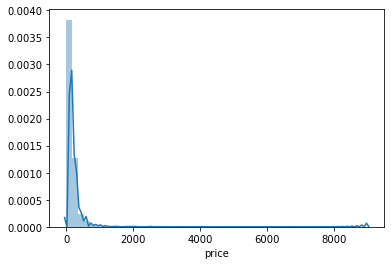

In [69]:
sns.distplot(df['price'])

Price is heavily right skewed so we will apply suitable transformation techniques

In [70]:
df2 = df.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1['price'].min()

-inf

In [71]:
df[df['price']==0]

,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
2586,1.0,1.0,0.0,100.0,38.611818,0.0,1.0,1125.0,1.0,1.0,...,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0
2947,7.0,7.0,0.0,750.0,275.000000,25.0,3.0,1125.0,3.0,7.0,...,0.0,1.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0
3108,7.0,7.0,0.0,0.0,25.000000,0.0,1.0,90.0,1.0,4.0,...,0.0,1.0,0.0,4.0,0.0,0.0,7.0,1.0,6.0,0.0


on applying log transorm we came to know that there are 20 hosts with a price of 0 these may be system errors or needs to be checked for further investigation

In [72]:
df = df[df['price']!=0]

In [73]:
df['log_p'] = np.log(df['price'])

after doing log transformation we have reduced the skewness of the data comparitively.

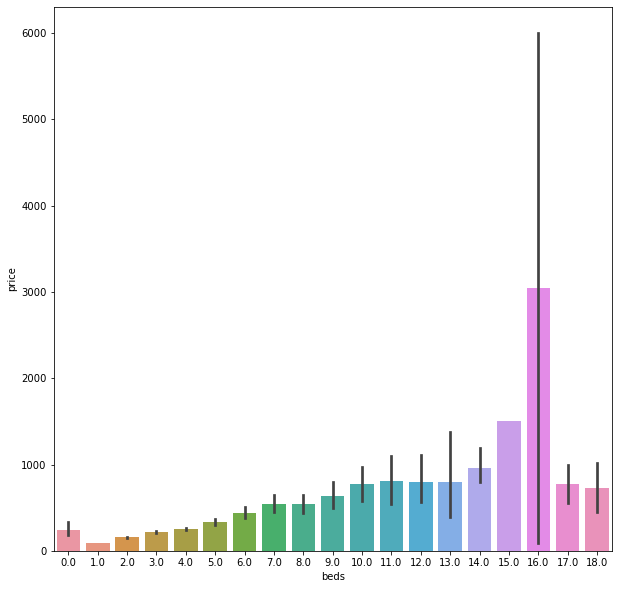

In [74]:
plt.figure(figsize = (10,10))
sns.barplot(x = df['beds'],y = df['price'])

we can see that based on the number of beds the price keeps increasing but there is a outlier in which the price is nearly 6000$ for one observation.It can be priced wrongly and we will notify the host accordingly.

In [75]:
df[df['beds']==16]

,host_listings_count,host_total_listings_count,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,log_p
1062,11.0,11.0,6000.0,350.0,300.0,0.0,5.0,1125.0,5.0,5.0,...,0.0,0.0,4.0,0.0,0.0,9.0,9.0,0.0,0.0,8.699515
2041,1.0,1.0,85.0,100.0,0.0,30.0,1.0,1125.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,4.442651


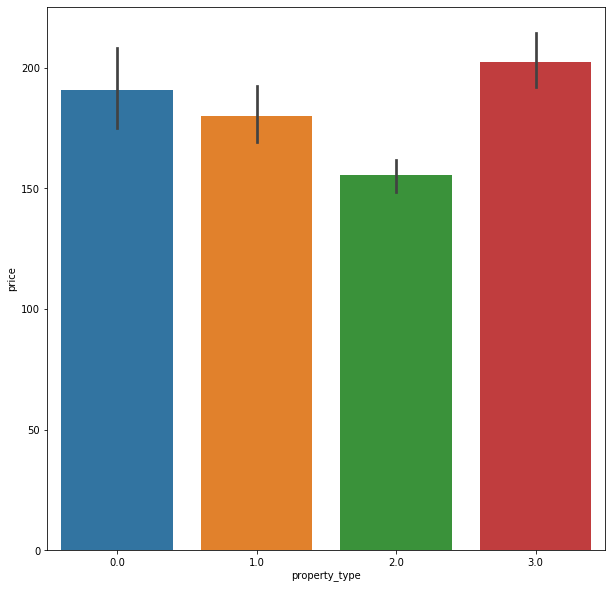

In [76]:
plt.figure(figsize = (10,10))
sns.barplot(x = df['property_type'],y = df['price'])

the price is high for houses compared to other properties such as apartments, condominium and others

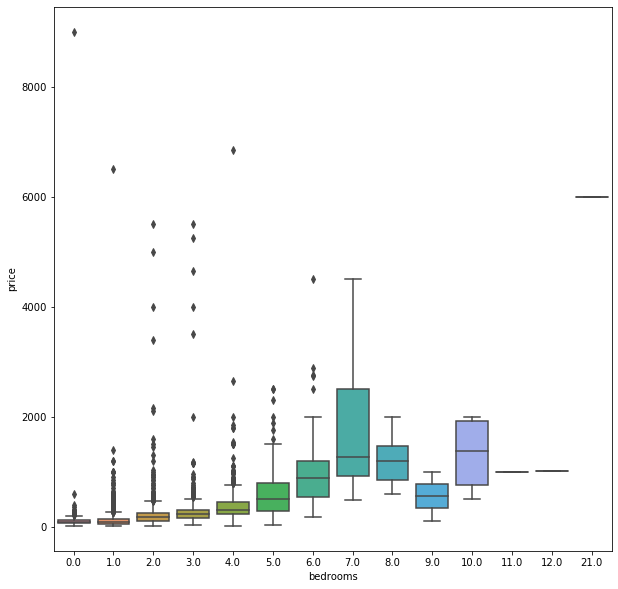

In [77]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['bedrooms'],y = df['price'])

An interesting observation is that there are so many outliers for the number of bedrooms from 0 to 6 but after 7 there are mostly no outliers. This shows that host with the higher number of bedrooms keep their price constant between the other hosts with the same number of bedrooms than the hosts with the smaller number of bedrooms.

In [78]:
df.drop(['has_availability','is_business_travel_ready'],axis = 1,inplace = True)

In [79]:
df.corr()['price']>0.4 

host_listings_count                             False
host_total_listings_count                       False
price                                            True
security_deposit                                False
cleaning_fee                                     True
extra_people                                    False
minimum_nights                                  False
maximum_nights                                  False
minimum_minimum_nights                          False
maximum_minimum_nights                          False
minimum_maximum_nights                          False
maximum_maximum_nights                          False
minimum_nights_avg_ntm                          False
maximum_nights_avg_ntm                          False
availability_30                                 False
availability_60                                 False
availability_90                                 False
availability_365                                False
number_of_reviews           

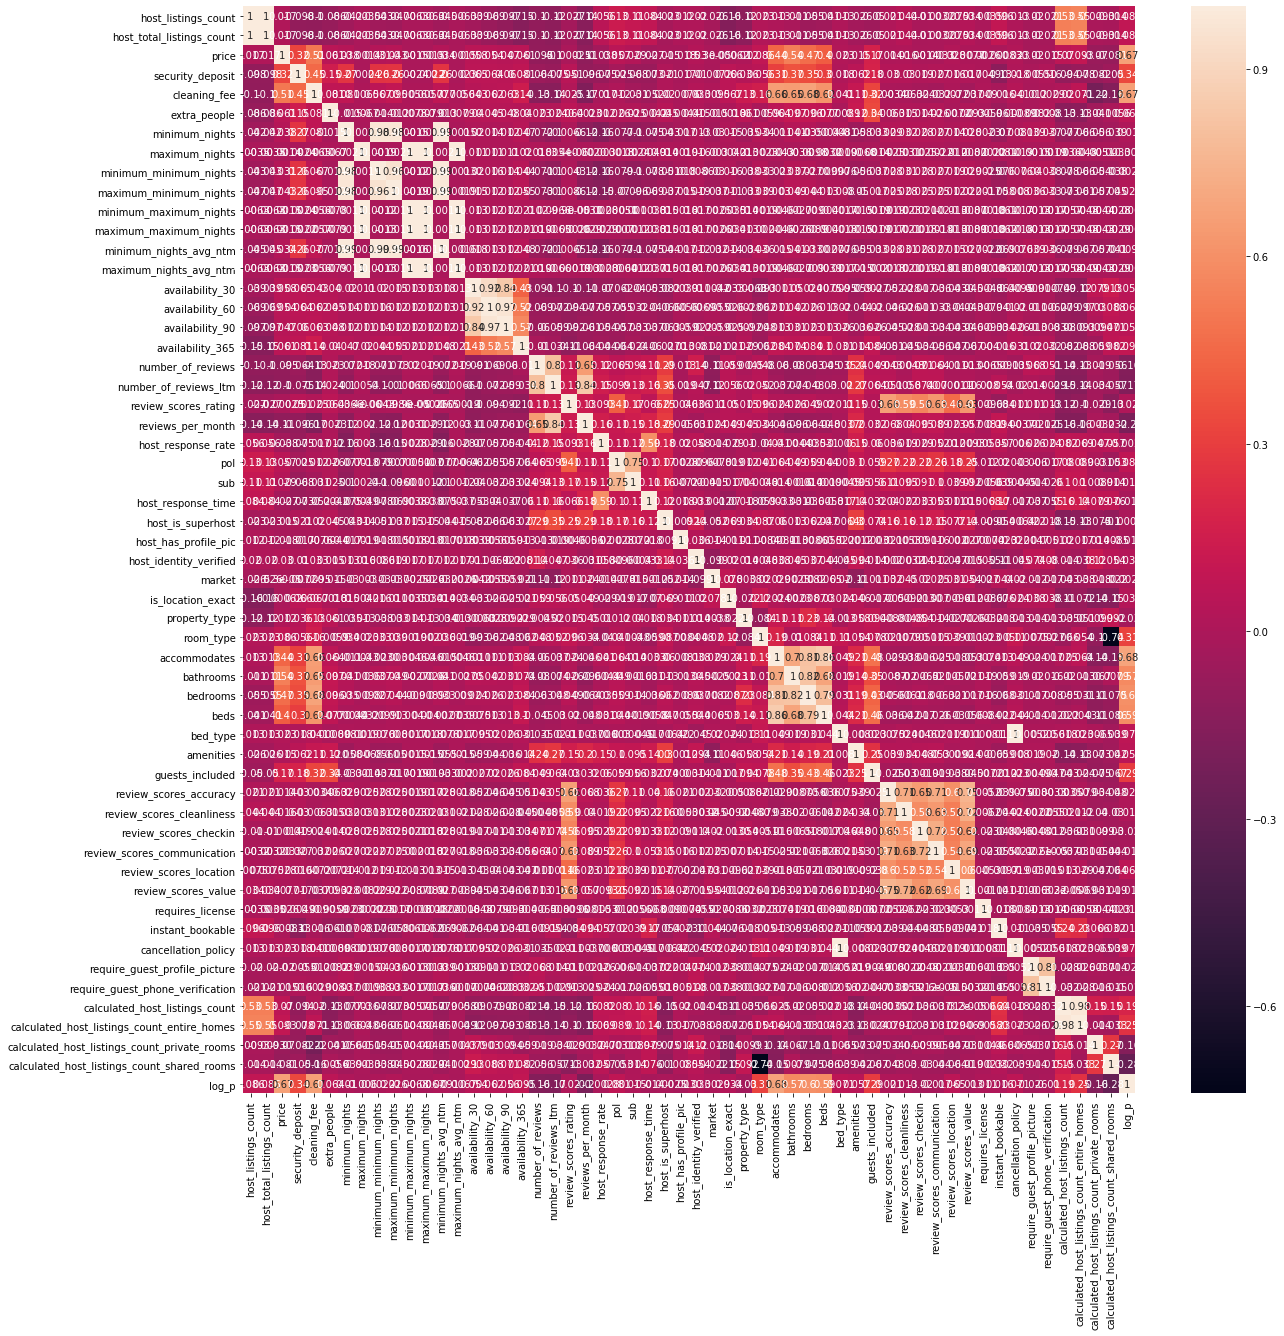

In [80]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

here we can see that the features which we thought would be important while making a booking has a high correlation with the price.

# Base Model:

In [81]:
X = df.drop(['log_p','price'],axis = 1)
y = df['log_p']

In [82]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lin_reg.score(X,y)

0.6703429925886039

The training score is more or less similar to the test score hence the model is neither overfit nor underfit

In [84]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_p   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     396.5
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:23:52   Log-Likelihood:                -6674.3
No. Observations:                9997   AIC:                         1.345e+04
Df Residuals:                    9945   BIC:                         1.383e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            2.5815      0.178     14.520      0.000       2.233       2.930
host_listings_count                          -7.862e-05   1.28e-05     -6.121      0.000      -0.000   -5.34e-05
host_total_listings_count                    -7.862e-05   1.28e-05     -6.121      0.000      -0.000   -5.34e-05
security_deposit                                 0.0001   1.25e-05      9.683      0.000    9.62e-05       0.000
cleaning_fee                                     0.0024   8.64e-05     27.283      0.000       0.002       0.003
extra_people                                     0.0014      0.000      6.048      0.000       0.001       0.002
minimum_nights                                  -0.0042      0.002     -1.820      0.069      -0.009       0.000
maximum_nights                                  -0.0006   3.85e-05    -14.559      0.000      -0.001      -0.000
minimum_minimum_nights                           0.0011      0.002      0.501      0.617      -0.003       0.005
maximum_minimum_nights                           0.0039      0.002      1.870      0.061      -0.000       0.008
minimum_maximum_nights                          -0.0002      0.000     -1.570      0.116      -0.000    4.53e-05
maximum_maximum_nights                           0.0005      0.000      2.189      0.029    4.96e-05       0.001
minimum_nights_avg_ntm                          -0.0027      0.005     -0.534      0.594      -0.013       0.007
maximum_nights_avg_ntm                           0.0003      0.000      0.947      0.344      -0.000       0.001
availability_30                                  0.0058      0.001      4.293      0.000       0.003       0.008
availability_60                                  0.0010      0.002      0.652      0.515      -0.002       0.004
availability_90                                 -0.0014      0.001     -1.834      0.067      -0.003    9.77e-05
availability_365                                 0.0002   5.02e-05      3.854      0.000    9.51e-05       0.000
number_of_reviews                               -0.0002      0.000     -0.994      0.320      -0.001       0.000
number_of_reviews_ltm                           -0.0013      0.001     -1.928      0.054      -0.003    2.26e-05
review_scores_rating                            -0.0014      0.001     -1.788      0.074      -0.003       0.000
reviews_per_month                               -0.0259      0.006     -4.384      0.000      -0.037      -0.014
host_response_rate                              -0.0007      0.000     -1.619      0.105      -0.002       0.000
pol                                              0.2835      0.056      5.104      0.000       0.175       0.392
sub                             

In [85]:
df = df.reset_index()

In [86]:
df.drop('index',1,inplace = True)

In [87]:
kf = KFold(n_splits = 5)

In [241]:
X = df.drop(['log_p','price'],axis = 1)
y = df['log_p']
model = LinearRegression()

In [242]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [243]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = model.score(X_train,y_train)
    te = model.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.6999727307069987
The test score is : 0.6969173063278784


In [244]:
sum(scores)/5

0.2259693785312959

In [245]:
sum(np.sqrt(scores))/5

0.4741701620912694

RMSE of the base model is 0.4741701620912694

We wont be using linear regression as our data is not linear and it has failed some of the assumptions.

# Fine tuning the model:

Using lasso method to see how the impact of so many dependent variables affects our model performance

In [114]:
#Lasso Model
lambdas=np.linspace(0.0001,2,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [115]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [116]:
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 2.03010101e-02, 4.05020202e-02, 6.07030303e-02,
       8.09...
       1.61618081e+00, 1.63638182e+00, 1.65658283e+00, 1.67678384e+00,
       1.69698485e+00, 1.71718586e+00, 1.73738687e+00, 1.75758788e+00,
       1.77778889e+00, 1.79798990e+00, 1.81819091e+00, 1.83839192e+00,
       1.85859293e+00, 1.87879394e+00, 1.89899495e+00, 1.91919596e+00,
       1.93939697e+00, 1.95959798e+00, 1.97979899e+00, 2.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [117]:
grid_search.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
lasso_model=grid_search.best_estimator_

In [227]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    lasso_model.fit(X_train,y_train)
    y_pred = lasso_model.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [228]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = lasso_model.score(X_train,y_train)
    te = lasso_model.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.6927437084129198
The test score is : 0.6902696428642395


In [229]:
sum(scores)/5

0.23226437528147023

In [230]:
sum(np.sqrt((scores)))/5

0.4804863323483496

Using ridge method to see how the impact of so many dependent variables affect our model performance

In [122]:
#Ridge Model
lambdas=np.linspace(0.0001,2,100)
model=Ridge(fit_intercept=True)
params={'alpha':lambdas}

In [1]:
import numpy as np
np.linspace(0.0001,2,100)

array([1.00000000e-04, 2.03010101e-02, 4.05020202e-02, 6.07030303e-02,
       8.09040404e-02, 1.01105051e-01, 1.21306061e-01, 1.41507071e-01,
       1.61708081e-01, 1.81909091e-01, 2.02110101e-01, 2.22311111e-01,
       2.42512121e-01, 2.62713131e-01, 2.82914141e-01, 3.03115152e-01,
       3.23316162e-01, 3.43517172e-01, 3.63718182e-01, 3.83919192e-01,
       4.04120202e-01, 4.24321212e-01, 4.44522222e-01, 4.64723232e-01,
       4.84924242e-01, 5.05125253e-01, 5.25326263e-01, 5.45527273e-01,
       5.65728283e-01, 5.85929293e-01, 6.06130303e-01, 6.26331313e-01,
       6.46532323e-01, 6.66733333e-01, 6.86934343e-01, 7.07135354e-01,
       7.27336364e-01, 7.47537374e-01, 7.67738384e-01, 7.87939394e-01,
       8.08140404e-01, 8.28341414e-01, 8.48542424e-01, 8.68743434e-01,
       8.88944444e-01, 9.09145455e-01, 9.29346465e-01, 9.49547475e-01,
       9.69748485e-01, 9.89949495e-01, 1.01015051e+00, 1.03035152e+00,
       1.05055253e+00, 1.07075354e+00, 1.09095455e+00, 1.11115556e+00,
      

In [123]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [124]:
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 2.03010101e-02, 4.05020202e-02, 6.07030303e-02,
       8.09040404e-02, 1.01105051e-01, 1.21306061e-01, 1.41507071e-01...
       1.61618081e+00, 1.63638182e+00, 1.65658283e+00, 1.67678384e+00,
       1.69698485e+00, 1.71718586e+00, 1.73738687e+00, 1.75758788e+00,
       1.77778889e+00, 1.79798990e+00, 1.81819091e+00, 1.83839192e+00,
       1.85859293e+00, 1.87879394e+00, 1.89899495e+00, 1.91919596e+00,
       1.93939697e+00, 1.95959798e+00, 1.97979899e+00, 2.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [125]:
grid_search.best_estimator_

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
ridge_model = grid_search.best_estimator_

In [246]:
X = df.drop(['log_p','price'],axis = 1)
y = df['log_p']

In [247]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    ridge_model.fit(X_train,y_train)
    y_pred = ridge_model.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [248]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = ridge_model.score(X_train,y_train)
    te = ridge_model.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.6999739366938329
The test score is : 0.6969171773896996


In [239]:
sum(scores)/5

0.22598190001907253

In [240]:
sum(np.sqrt(scores))/5

0.4741788829806479

In [131]:
#Random Forest Regressor
regressor = RandomForestRegressor()

In [132]:
params = {'n_estimators':[50,100,150,200],'max_depth':[5,10,15,20]}

In [133]:
grid_search=GridSearchCV(regressor,param_grid=params,cv=5,scoring='neg_mean_absolute_error')

In [134]:
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20],
 

In [135]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [136]:
rfr = grid_search.best_estimator_

In [249]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [250]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = rfr.score(X_train,y_train)
    te = rfr.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.9537696074884584
The test score is : 0.957299366677655


In [255]:
sum(scores)/5

0.0873066990949691

In [251]:
sum(np.sqrt(scores))/5

0.294095880549775

In [140]:
# Adaboost Regressor
ad  =AdaBoostRegressor()

In [141]:
params = {'n_estimators':[50,100,150,200],'learning_rate':np.linspace(0.1,1,10)}

In [142]:
grid_search=GridSearchCV(ad,param_grid=params,cv=5,scoring='neg_mean_absolute_error')

In [143]:
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [144]:
grid_search.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=50, random_state=None)

In [145]:
adr =  grid_search.best_estimator_

In [256]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    adr.fit(X_train,y_train)
    y_pred = adr.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [257]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = adr.score(X_train,y_train)
    te = adr.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.6346824534390085
The test score is : 0.6322477904539063


In [259]:
sum(scores)/5

0.2569058155303499

In [258]:
sum(np.sqrt(scores))/5

0.5053828589047668

In [149]:
# Gradientboost Regressor
gd  =GradientBoostingRegressor()

In [150]:
params = {'n_estimators':[50,100,150,200],'learning_rate':np.linspace(0.1,1,10),'max_depth':[5,10,15]}

In [151]:
grid_search=GridSearchCV(gd,param_grid=params,cv=5,scoring='neg_mean_absolute_error')

In [152]:
grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [153]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [154]:
gdr =  grid_search.best_estimator_

In [260]:
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    gdr.fit(X_train,y_train)
    y_pred = gdr.predict(X_test)
    scores.append(mean_squared_error(y_test,y_pred))

In [261]:
sc_tr = []
sc_te =[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tr = gdr.score(X_train,y_train)
    te = gdr.score(X_test,y_test)
    sc_tr.append(tr)
    sc_te.append(te)
print("The train score is :",sum(sc_tr)/5)
print("The test score is :",sum(sc_te)/5)

The train score is : 0.9668927579242326
The test score is : 0.9681963812582046


In [263]:
sum(scores)/5

0.05204860796061354

In [262]:
sum(np.sqrt(scores))/5

0.22592844294571268

### Selecting the best model:

In [1]:
trs = [0.69,0.64,0.69,0.95,0.63,0.96]
tes = [0.69,0.64,0.69,0.95,0.63,0.96]
mse  =[0.22,0.23,0.22,0.08,0.25,0.05]
rmse = [0.474170,0.48,0.474178,0.29,0.50,0.22]

In [6]:
mb = pd.DataFrame({'Train score':trs,'Test score':tes,'MSE':mse,'RMSE':rmse},index = ['Linear regression','Lasso','Ridge','Random forest regressor','Ada boost Regreesor','Gradient Boosting Regressor'])
mb

,Train score,Test score,MSE,RMSE
Linear regression,0.69,0.69,0.22,0.474170
Lasso,0.64,0.64,0.23,0.480000
Ridge,0.69,0.69,0.22,0.474178
Random forest regressor,0.95,0.95,0.08,0.290000
Ada boost Regreesor,0.63,0.63,0.25,0.500000
Gradient Boosting Regressor,0.96,0.96,0.05,0.220000


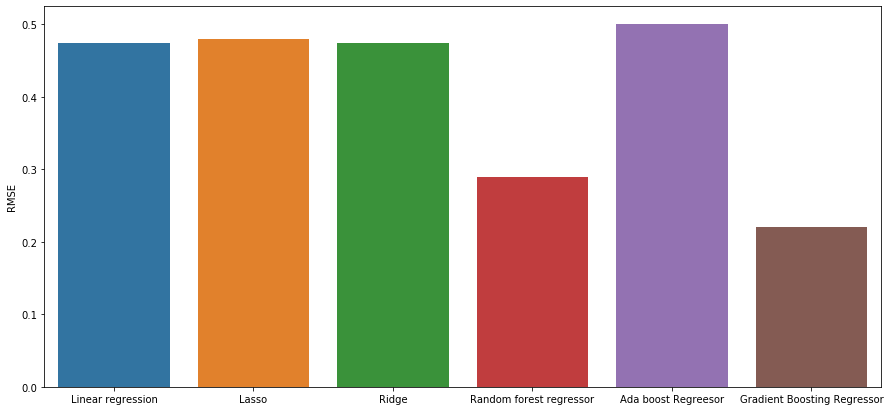

In [11]:
plt.figure(figsize = (15,7))
sns.barplot(x =mb.index, y = mb['RMSE'] )

Based on the above different models evaluation metrics we can see that all the models are neither overfit nor underfit. The Gradient boosting regressor has the least rmse score compared to other models. so we will be selecting this as the best model.

### Clustering the data to get better insights about the host

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()
df_scaled =  scaler.fit_transform(df)

In [163]:
df_scaled = pd.DataFrame(df_scaled)

In [165]:
df_scaled.columns = df.columns

In [166]:
cluster_range=range(1,18)
cluster_errors=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(df_scaled)
    cluster_errors.append(model.inertia_)

In [167]:
clusters_df = pd.DataFrame({'num_clusters':cluster_range , "Inertia":cluster_errors})

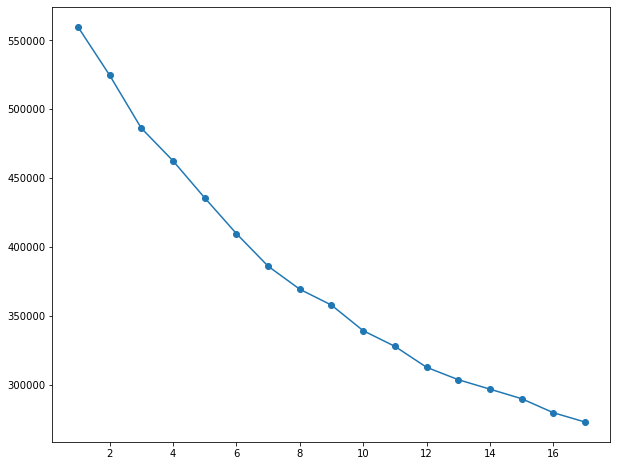

In [176]:
plt.figure(figsize = (10,8))
plt.plot(clusters_df.num_clusters , clusters_df.Inertia,marker = 'o')

In [187]:
kmeans = KMeans(n_clusters = 2,n_init = 15,random_state = 2)

In [188]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [189]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = df.columns

In [190]:
df_scaled['labels'] = kmeans.labels_

In [191]:
df['labels'] = kmeans.labels_

In [198]:
df[df['labels']==0]['pol'].mean()

0.38057518524087425

In [199]:
df[df['labels']==1]['pol'].mean()

0.39837248664854147

In [200]:
df['revenue']=df['price']*(30-df['availability_30'])

In [201]:
df[df['labels']==0]['revenue'].mean()

3046.118381112985

In [215]:
df[df['labels']==1]['revenue'].mean()

1427.2707622298067

Here we can see that class 0 hosts bring more than 2x the revenue of class 1 hosts. So special care can be given to the hosts who bring in more revenue

# Conclusion:

In this project we aim to build a model where we can predict the price of an listing and suggest what price the new host should set for their listing so that they can get better revenue and we also try to notify the hosts whose pricing is not to the expected standards of airbnb some may have set their price very low in their locality or some may have set their price high in their locality.Firstly we have reviews of the listings from the people where we use sentiment analysis to check whether the listing is positive, negative or its neutral. We use the concept of subjectivity
ad polarity and we add these columns to the main dataframe. We then check how much of the missing value is present in our data. Then we cleaned the data where we removed the special characters and spaces and we map some of the features manually as we cannot use label encoding since missing values are present in our data in other cases where missing values are not there we use label encoding.Once the data is encoded and cleaned we find a way to impute these missing values. We use mode imputation for the categorical variables and we use KNN impute for the numerical data as its widely preffered in the industry and it gives better results as compared to other imputation methods. Once the data is ready we use OLS table to find how much of the  proportion of the variance for a dependent variable that's explained by an independent variable in a regression model. Then we use Linear regression as the base model to find the mean squared error and root mean squared error. we further try to optimize the model to get better scores by using other types of regression model as the data is not linear and linear regression doesnt yield the expected results. We used several other techniques such as Lasso and ridge to add an penalty factor to the model to check the importance of variables and these models performed well comparitively to the Linear regression model.We find the optimal value of lambda using gridsearch cv and use Kfold cross
validation to check the train and test score to see whether the model is overfit or underfit. We also use Kfold instead of train_test_split as the selection of data may be biased. In order to further decrease the rmse score we use Methods like Adaboosting regressor , Random forest regressor and Gradient boosting regressor to see how well the model performs on a tree based regressor. We use the same techniques we did in lasso and ridge here to find the optimal values of each models using gridsearch cv and we use Kfold validation to evaluate these models. Out of these three models Random forest regressor and Gradient boosting regressor performed compartively better to all other models. If we had to select one model then we use Gradient Boosting regressor as it had the least rmse among all the other models. Then we used tableau to find insights about the behavioural patterns of the hosts and we use this insights to propose changes to the hosts if needed. Finally we use Kmeans clustering to cluster the data to see which hosts are of more importance to the Airbnb as they bring in more revenue By doing this we can give customised ideas and percentage of cuts to the hosts and we propose an idea to the hosts who bring in less revenue based on the insights generated from tableau and analysing the pricing strategy of the hosts 
who bring in more revenue.

 
